<a href="https://colab.research.google.com/github/Menox-tech/Road-Traffic-Injuries/blob/main/TrafficProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import library 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.utils import resample
from mlxtend.plotting import plot_confusion_matrix
from sklearn.decomposition import PCA
from collections import Counter
from imblearn.over_sampling import SMOTE

In [ ]:
# No NEED
# upload dataset files, the data is splitted into 2 files; accident characteritstics data file (caracteristiques-2019.csv) and drivers data file (usagers-2019.csv)
#import io
#from google.colab import files
#uploaded = files.upload()

#for name, data in uploaded.items():
#  with open(name, 'wb') as f:
#    f.write(data)
#    print ('saved file', name)


Saving caracteristiques-2019.csv to caracteristiques-2019.csv
Saving usagers-2019.csv to usagers-2019.csv
saved file caracteristiques-2019.csv
saved file usagers-2019.csv


In [2]:
# read data using pd.read_csv, then store the data in df dataframe
# charcts_df ==> Accident characterstics 
# drivers_df ==> Drivers data

charcts_df = pd.read_csv('caracteristiques-2019.csv', encoding='utf-8')
drivers_df = pd.read_csv('usagers-2019.csv', encoding='utf-8')

In [30]:
# show random dataframe content (5 rows) for the two datasets
charcts_df.sample(5)
charcts_df.shape

(58413, 15)

In [4]:
drivers_df.sample(5)

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
132253,201900058520,138 196 204,B01,1,1,1,1,1986,1,1,8,-1,-1,-1,-1
114986,201900050904,138 210 442,A01,1,1,4,1,1976,9,0,-1,-1,0,0,-1
129714,201900057403,138 198 257,A01,1,1,1,2,1948,5,1,-1,-1,0,0,-1
43785,201900019417,138 270 147,A01,1,1,4,1,1999,9,1,-1,-1,0,0,-1
74414,201900032899,138 244 388,B01,1,1,4,1,2004,0,2,0,-1,-1,0,-1


In [6]:
# overview the two datasets, show basic stats
charcts_df.describe()

,Num_Acc,jour,mois,an,hrmn,lum,agg,int,atm,col,lat,long
count,5.884000e+04,58840.000000,58840.000000,58840.0,58840.000000,58840.000000,58840.000000,58840.000000,58840.000000,58840.000000,5.884000e+04,5.884000e+04
mean,2.019000e+11,15.683396,6.687542,2019.0,0.576363,1.944867,1.645887,2.025357,1.617794,4.165058,4.458837e+08,2.874025e+07
std,1.698579e+04,8.719610,3.387344,0.0,0.230834,1.504409,0.478248,1.997756,1.677988,1.954030,1.183000e+08,1.873924e+08
min,2.019000e+11,1.000000,1.000000,2019.0,0.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-6.142566e+08,-1.781574e+09
25%,2.019000e+11,8.000000,4.000000,2019.0,0.402778,1.000000,1.000000,1.000000,1.000000,3.000000,4.478784e+08,1.410582e+07
50%,2.019000e+11,16.000000,7.000000,2019.0,0.611111,1.000000,2.000000,1.000000,1.000000,3.000000,4.782765e+08,2.398625e+07
75%,2.019000e+11,23.000000,10.000000,2019.0,0.756944,3.000000,2.000000,2.000000,1.000000,6.000000,4.885689e+08,4.828180e+07
max,2.019001e+11,31.000000,12.000000,2019.0,0.999306,5.000000,2.000000,9.000000,9.000000,7.000000,6.356807e+08,1.740234e+09


In [5]:
drivers_df.describe()

,Num_Acc,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,etatp
count,1.329770e+05,132977.000000,132977.000000,132977.000000,132977.000000,132977.000000,132977.000000,132977.000000,132977.000000,132977.000000,132977.000000,132977.000000
mean,2.019000e+11,2.184754,1.352587,2.542635,1.320304,1980.079600,3.224279,2.179790,1.454282,-0.913361,-0.109267,-0.810306
std,1.699444e+04,2.695724,0.630635,1.371815,0.466595,19.164625,2.667380,2.474627,3.284485,0.892062,1.247776,0.648306
min,2.019000e+11,1.000000,1.000000,1.000000,1.000000,1900.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2.019000e+11,1.000000,1.000000,1.000000,1.000000,1967.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,2.019000e+11,1.000000,1.000000,3.000000,1.000000,1983.000000,4.000000,1.000000,0.000000,-1.000000,0.000000,-1.000000
75%,2.019000e+11,2.000000,2.000000,4.000000,2.000000,1995.000000,5.000000,2.000000,3.000000,-1.000000,0.000000,-1.000000
max,2.019001e+11,10.000000,3.000000,4.000000,2.000000,2019.000000,9.000000,9.000000,9.000000,9.000000,9.000000,3.000000


In [5]:
# check features (columns) types for the 2 datasets
charcts_df.dtypes

Num_Acc      int64
jour         int64
mois         int64
an           int64
hrmn       float64
lum          int64
dep         object
com         object
agg          int64
int          int64
atm          int64
col          int64
adr         object
lat          int64
long         int64
dtype: object

In [7]:
drivers_df.dtypes

Num_Acc         int64
id_vehicule    object
num_veh        object
place           int64
catu            int64
grav            int64
sexe            int64
an_nais         int64
trajet          int64
secu1           int64
secu2           int64
secu3           int64
locp            int64
actp           object
etatp           int64
dtype: object

In [5]:
# change columns names from Frenc to English
charcts_df.rename(columns = {'Num_Acc': 'acc_id', 'jour': 'Day', 'mois':'Month', 'an':'Year','hrmn':'Hour_Mins', 'lum':'Light','dep':'Department', 'com':'Municipality','agg':'Location', 'int':'Intersection','atm':'Weather_cond', 'col':'Collison_type','adr':'Address', 'lat':'Latitude','long':'Longtitude'}, inplace = True)
drivers_df.rename(columns = {'Num_Acc': 'acc_id','place':'user_place', 'catu':'user_category','grav':'injury_severity','sexe':'sex','an_nais':'Birth_year','trajet':'travel_reason','locp':'ped_loc', 'actp':'ped_action','etatp':'ped_company'}, inplace = True)

In [9]:
# explore the data type at each series
charcts_df.dtypes

acc_id             int64
Day                int64
Month              int64
Year               int64
Hour_Mins        float64
Light              int64
Department        object
Municipality      object
Location           int64
Intersection       int64
Weather_cond       int64
Collison_type      int64
Address           object
Latitude           int64
Longtitude         int64
dtype: object

In [12]:
charcts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58840 entries, 0 to 58839
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   acc_id         58840 non-null  float64
 1   Day            58840 non-null  int64  
 2   Month          58840 non-null  int64  
 3   Year           58840 non-null  int64  
 4   Light          58840 non-null  int64  
 5   Department     58840 non-null  object 
 6   Municipality   58840 non-null  object 
 7   Location       58840 non-null  int64  
 8   Intersection   58840 non-null  int64  
 9   Weather_cond   58840 non-null  int64  
 10  Collison_type  58840 non-null  int64  
 11  Address        58413 non-null  object 
 12  Latitude       58840 non-null  int64  
 13  Longtitude     58840 non-null  int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 6.3+ MB


In [13]:
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132977 entries, 0 to 132976
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   acc_id           132977 non-null  int64 
 1   id_vehicule      132977 non-null  object
 2   num_veh          132977 non-null  object
 3   user_place       132977 non-null  int64 
 4   user_category    132977 non-null  int64 
 5   injury_severity  132977 non-null  int64 
 6   sex              132977 non-null  int64 
 7   Birth_year       132977 non-null  int64 
 8   travel_reason    132977 non-null  int64 
 9   secu1            132977 non-null  int64 
 10  secu2            132977 non-null  int64 
 11  secu3            132977 non-null  int64 
 12  ped_loc          132977 non-null  int64 
 13  ped_action       132977 non-null  object
 14  ped_company      132977 non-null  int64 
dtypes: int64(12), object(3)
memory usage: 15.2+ MB


In [7]:
# check null values
charcts_df.isna().sum()

acc_id             0
Day                0
Month              0
Year               0
Hour_Mins          0
Light              0
Department         0
Municipality       0
Location           0
Intersection       0
Weather_cond       0
Collison_type      0
Address          427
Latitude           0
Longtitude         0
dtype: int64

In [8]:
drivers_df.isna().sum()

acc_id             0
id_vehicule        0
num_veh            0
user_place         0
user_category      0
injury_severity    0
sex                0
Birth_year         0
travel_reason      0
secu1              0
secu2              0
secu3              0
ped_loc            0
ped_action         0
ped_company        0
dtype: int64

In [6]:
#The output of characteristics dataest shows null values for all features except accident_id, such values are not significant nor appropriate for analysis. As the dataset size is quite large, we will remove such records.
# drop all rows with any NaN and NaT values
charcts_df = charcts_df.dropna()
charcts_df.isna().sum()

acc_id           0
Day              0
Month            0
Year             0
Hour_Mins        0
Light            0
Department       0
Municipality     0
Location         0
Intersection     0
Weather_cond     0
Collison_type    0
Address          0
Latitude         0
Longtitude       0
dtype: int64

In [ ]:
# However, the drivers dataset has no null values (checked above).

In [10]:
# check on columns 
charcts_df.columns

Index(['acc_id', 'Day', 'Month', 'Year', 'Hour_Mins', 'Light', 'Department',
       'Municipality', 'Location', 'Intersection', 'Weather_cond',
       'Collison_type', 'Address', 'Latitude', 'Longtitude'],
      dtype='object')

In [11]:
drivers_df.columns

Index(['acc_id', 'id_vehicule', 'num_veh', 'user_place', 'user_category',
       'injury_severity', 'sex', 'Birth_year', 'travel_reason', 'secu1',
       'secu2', 'secu3', 'ped_loc', 'ped_action', 'ped_company'],
      dtype='object')

In [13]:
charcts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58413 entries, 0 to 58839
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   acc_id         58413 non-null  int64  
 1   Day            58413 non-null  int64  
 2   Month          58413 non-null  int64  
 3   Year           58413 non-null  int64  
 4   Hour_Mins      58413 non-null  float64
 5   Light          58413 non-null  int64  
 6   Department     58413 non-null  object 
 7   Municipality   58413 non-null  object 
 8   Location       58413 non-null  int64  
 9   Intersection   58413 non-null  int64  
 10  Weather_cond   58413 non-null  int64  
 11  Collison_type  58413 non-null  int64  
 12  Address        58413 non-null  object 
 13  Latitude       58413 non-null  int64  
 14  Longtitude     58413 non-null  int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 7.1+ MB


In [130]:
# convert the Day, Month, Year into datetime object 
#charcts_df['Day'] = pd.to_datetime(charcts_df['Day']).dt.day
#charcts_df['Month'] = pd.to_datetime(charcts_df['Month']).dt.month
#charcts_df['Year'] = pd.to_datetime(charcts_df['Year']).dt.year

In [16]:
# to save memory and make it more efficient, change the following features types from float to int.
# Light: 5 types, Location: 2 types, Intersection: 9, Weather: 9, Collision: 6 types
#charcts_df[['acc_id','Light', 'Location','Intersection','Weather_cond','Collison_type']] = charcts_df[['acc_id','Light', 'Location','Intersection','Weather_cond','Collison_type']].astype(int)
# Department and Municipality for some rows have some characters, so we will leave them as they are. Location is string. 

In [138]:
charcts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58413 entries, 0 to 58839
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   acc_id         58413 non-null  int64  
 1   Day            58413 non-null  int64  
 2   Month          58413 non-null  int64  
 3   Year           58413 non-null  int64  
 4   Hour_Mins      58413 non-null  float64
 5   Light          58413 non-null  int64  
 6   Department     58413 non-null  object 
 7   Municipality   58413 non-null  object 
 8   Location       58413 non-null  int64  
 9   Intersection   58413 non-null  int64  
 10  Weather_cond   58413 non-null  int64  
 11  Collison_type  58413 non-null  int64  
 12  Address        58413 non-null  object 
 13  Latitude       58413 non-null  int64  
 14  Longtitude     58413 non-null  int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 7.1+ MB


In [15]:
# now check the drivers dataset.
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132977 entries, 0 to 132976
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   acc_id           132977 non-null  int64 
 1   id_vehicule      132977 non-null  object
 2   num_veh          132977 non-null  object
 3   user_place       132977 non-null  int64 
 4   user_category    132977 non-null  int64 
 5   injury_severity  132977 non-null  int64 
 6   sex              132977 non-null  int64 
 7   Birth_year       132977 non-null  int64 
 8   travel_reason    132977 non-null  int64 
 9   secu1            132977 non-null  int64 
 10  secu2            132977 non-null  int64 
 11  secu3            132977 non-null  int64 
 12  ped_loc          132977 non-null  int64 
 13  ped_action       132977 non-null  object
 14  ped_company      132977 non-null  int64 
dtypes: int64(12), object(3)
memory usage: 15.2+ MB


In [7]:
#print unique values in object columns to see data values
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':    # only objects nd not numbers
                print(f'{column}: {df[column].unique()}')

In [8]:
print_unique_col_values(drivers_df)

id_vehicule: ['138\xa0306\xa0524' '138\xa0306\xa0525' '138\xa0306\xa0523' ...
 '137\xa0982\xa0131' '137\xa0982\xa0129' '137\xa0982\xa0130']
num_veh: ['B01' 'A01' 'C01' 'D01' 'E01' 'Z01' 'Y01' 'I01' 'T01' 'O01' 'G01' 'F01'
 'M01' 'LB01' 'H01' 'J01' 'K01' 'L01' 'N01' 'W01' 'X01' 'U01' 'V01' 'Q01'
 'MA01' 'CB01' '\\01' 'VF01' 'P01']
ped_action: ['-1' '0' '3' '2' '1' 'B' '4' '9' '5' 'A' '8' '6' '7']


In [9]:
drivers_df["ped_action"].replace({"A": "10", "B": "11"}, inplace=True)
drivers_df[['ped_action']] = drivers_df[['ped_action']].astype(int)

In [20]:
#charcts_df[['Department', 'Municipality', 'Address']] = charcts_df[['Department', 'Municipality', 'Address']].astype('string')

In [ ]:
#charcts_df['Department'].str.strip()
#charcts_df['Municipality'].str.strip()
#charcts_df['Address'].str.strip()

In [ ]:
# Visualization

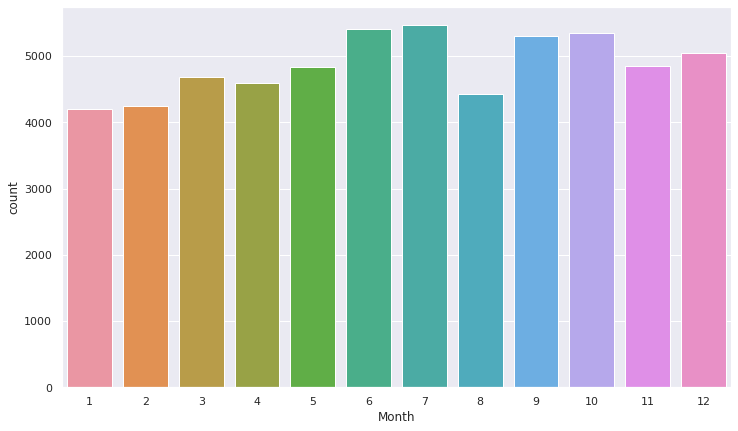

In [46]:
# plot Number of accidents per Month
sns.set_theme()
ax = plt.subplots(figsize = (12,7))
ax = sns.countplot(x="Month", data=charcts_df)

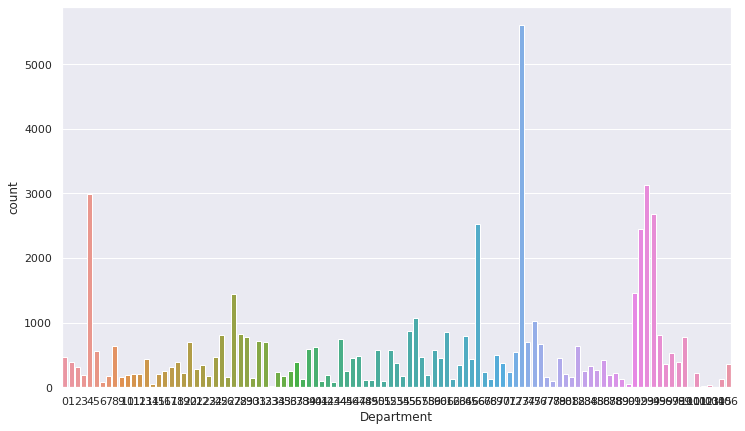

In [45]:
# plot Number of accidents per Municiapility. 
sns.set_theme()
ax = plt.subplots(figsize = (12,7))
ax = sns.countplot(x="Department", data=charcts_df)

In [10]:
# encode string data
charcts_df['Department'] = LabelEncoder().fit_transform(charcts_df['Department'])
charcts_df['Municipality'] = LabelEncoder().fit_transform(charcts_df['Municipality'])
charcts_df['Address'] = LabelEncoder().fit_transform(charcts_df['Address'])

In [51]:
# merge the two dataframe into one
df = pd.merge(charcts_df, drivers_df, on='acc_id')

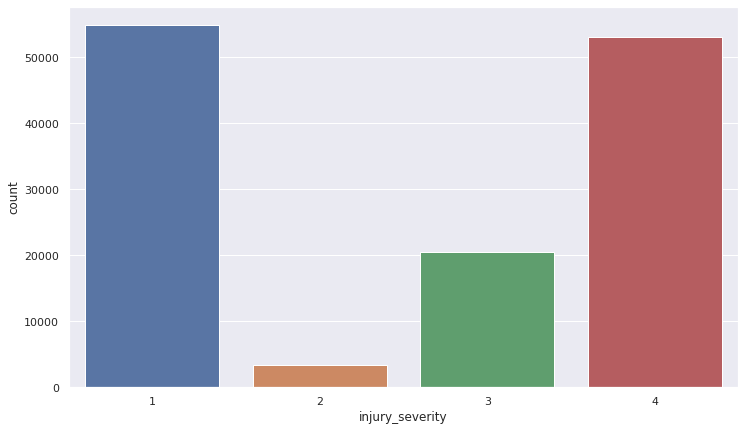

In [47]:
# plot injury_severity (the target) 
sns.set_theme()
ax = plt.subplots(figsize = (12,7))
sns.countplot(x="injury_severity", data=df)

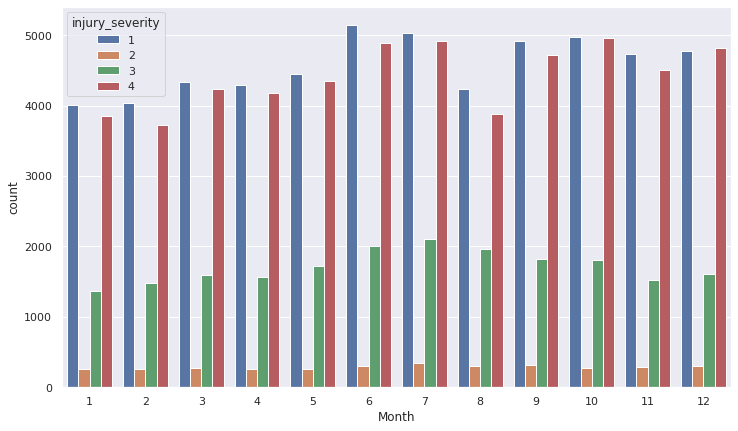

In [48]:
# plot injury_severity (the target) per month
sns.set_theme()
ax = plt.subplots(figsize = (12,7))
ax = sns.countplot(x="Month", hue="injury_severity", data=df)

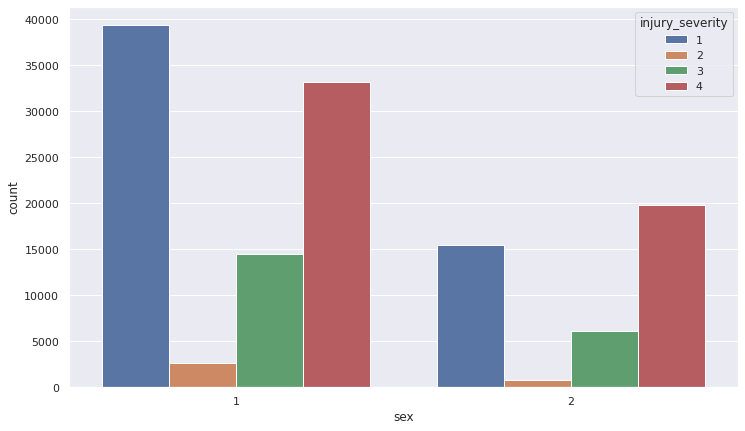

In [43]:
# plot injury_severity (the target) per gender
ax = plt.subplots(figsize = (12,7))
ax = sns.countplot(x="sex", hue="injury_severity", data=df)


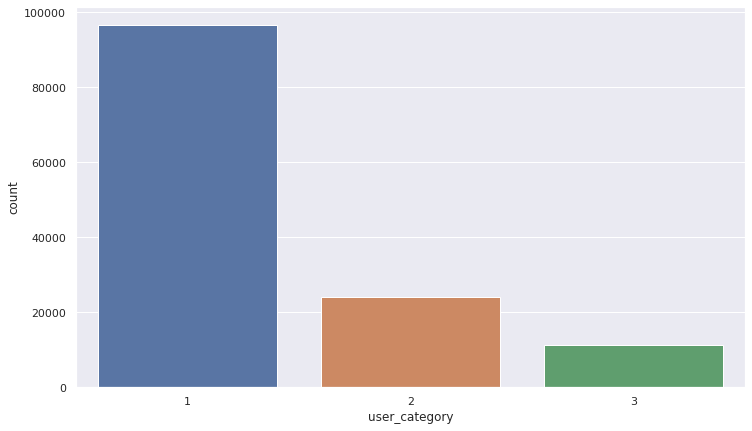

In [52]:
# plot user category
ax = plt.subplots(figsize = (12,7))
sns.countplot(x="user_category", data=df)

In [12]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of               acc_id  Day  Month  Year  ...  secu3  ped_loc  ped_action  ped_company
0       201900000001   30     11  2019  ...     -1       -1          -1           -1
1       201900000001   30     11  2019  ...     -1       -1          -1           -1
2       201900000001   30     11  2019  ...     -1       -1          -1           -1
3       201900000002   30     11  2019  ...     -1       -1          -1           -1
4       201900000003   28     11  2019  ...     -1       -1           0           -1
...              ...  ...    ...   ...  ...    ...      ...         ...          ...
131951  201900058837   27     11  2019  ...     -1       -1          -1           -1
131952  201900058838   30     11  2019  ...     -1       -1          -1           -1
131953  201900058839   30     11  2019  ...     -1       -1          -1           -1
131954  201900058840   29     11  2019  ...     -1       -1           0           -1
131955  201900058840  

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131956 entries, 0 to 131955
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   acc_id           131956 non-null  int64  
 1   Day              131956 non-null  int64  
 2   Month            131956 non-null  int64  
 3   Year             131956 non-null  int64  
 4   Hour_Mins        131956 non-null  float64
 5   Light            131956 non-null  int64  
 6   Department       131956 non-null  int64  
 7   Municipality     131956 non-null  int64  
 8   Location         131956 non-null  int64  
 9   Intersection     131956 non-null  int64  
 10  Weather_cond     131956 non-null  int64  
 11  Collison_type    131956 non-null  int64  
 12  Address          131956 non-null  int64  
 13  Latitude         131956 non-null  int64  
 14  Longtitude       131956 non-null  int64  
 15  id_vehicule      131956 non-null  object 
 16  num_veh          131956 non-null  obje

In [14]:
# remove unnecessary columns
df.drop(['Year','id_vehicule','num_veh', 'acc_id','Municipality','Address'], axis=1, inplace=True)

In [32]:
df.sample(5)

,Day,Month,Hour_Mins,Light,Department,Location,Intersection,Weather_cond,Collison_type,Latitude,Longtitude,user_place,user_category,injury_severity,sex,Birth_year,travel_reason,secu1,secu2,secu3,ped_loc,ped_action,ped_company
28315,16,6,0.800694,1,91,1,1,1,2,487136500,22777700,1,1,4,2,1951,0,1,0,-1,0,0,-1
117502,30,3,0.069444,5,73,2,2,1,3,488650530,22887160,1,1,1,1,1973,4,1,0,-1,0,0,-1
73267,24,7,0.378472,1,25,1,1,1,2,435628900,14181300,1,1,3,1,1973,4,1,8,-1,-1,0,-1
19993,23,11,0.427083,1,31,2,2,8,3,474189043,7065479,2,2,1,2,1972,5,1,0,-1,-1,0,-1
126397,2,12,0.781250,3,73,2,7,1,6,488625197,22868621,1,1,1,1,1987,1,2,6,-1,0,0,-1


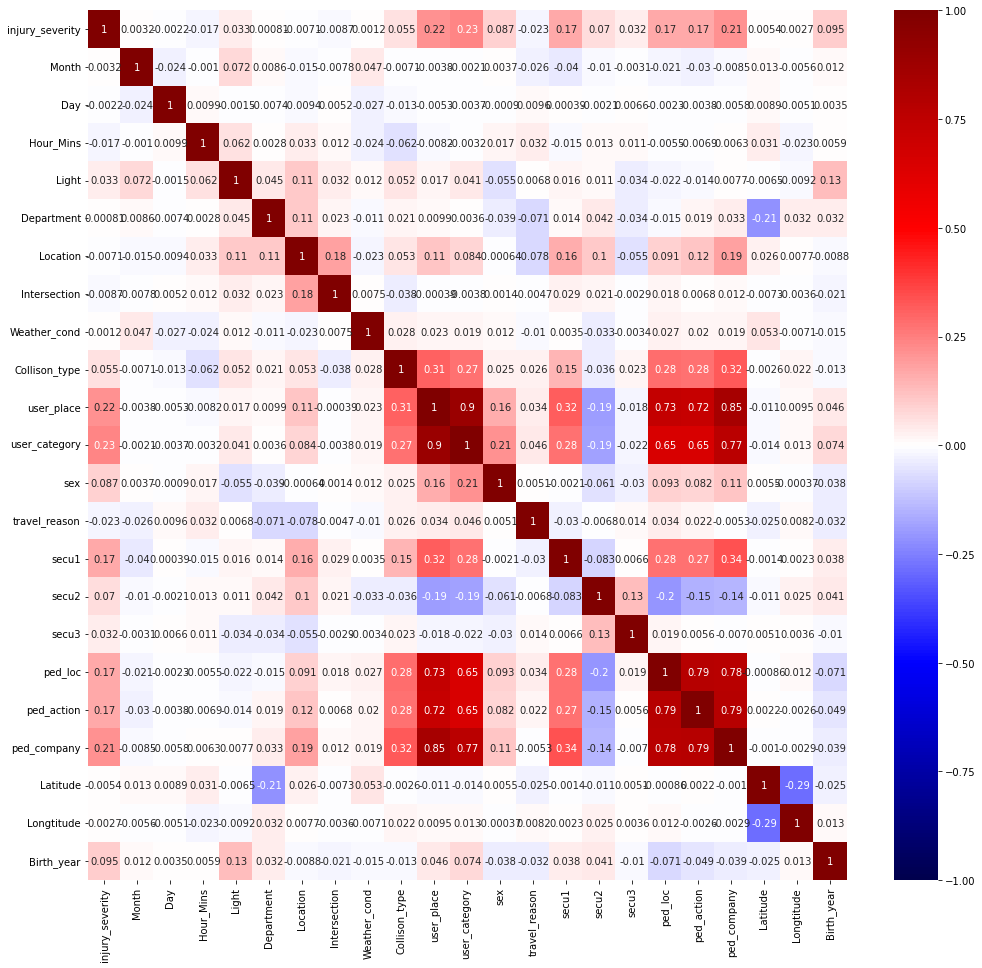

In [16]:
# correalte injury_severity and other features
#df_correlation = df[["injury_severity","user_category","sex","travel_reason","ped_action","ped_company"]]
df_correlation = df[["injury_severity",'Month','Day','Hour_Mins','Light','Department','Location','Intersection','Weather_cond','Collison_type',
           'user_place','user_category','sex','travel_reason','secu1','secu2','secu3',
           'ped_loc','ped_action','ped_company','Latitude','Longtitude','Birth_year']] 
df_correlation.corr()
plt.figure(figsize=(17, 16))
sns.heatmap(df_correlation.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [17]:
# user_category, user_place and pedisterian_company have the strongest coorelation coefficient with injury severity. However, both are **still small**.
#user_place highly correlated with user_category(.9) and ped_company(.85) ==> drop
df.drop(['user_category','ped_company'], axis=1, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131956 entries, 0 to 131955
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Day              131956 non-null  int64  
 1   Month            131956 non-null  int64  
 2   Hour_Mins        131956 non-null  float64
 3   Light            131956 non-null  int64  
 4   Department       131956 non-null  int64  
 5   Location         131956 non-null  int64  
 6   Intersection     131956 non-null  int64  
 7   Weather_cond     131956 non-null  int64  
 8   Collison_type    131956 non-null  int64  
 9   Latitude         131956 non-null  int64  
 10  Longtitude       131956 non-null  int64  
 11  user_place       131956 non-null  int64  
 12  user_category    131956 non-null  int64  
 13  injury_severity  131956 non-null  int64  
 14  sex              131956 non-null  int64  
 15  Birth_year       131956 non-null  int64  
 16  travel_reason    131956 non-null  int6

Class=4, n=53027 (40.185%)
Class=1, n=54933 (41.630%)
Class=3, n=20572 (15.590%)
Class=2, n=3424 (2.595%)


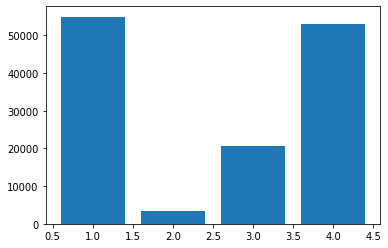

Class=4, n=54933 (25.000%)
Class=1, n=54933 (25.000%)
Class=3, n=54933 (25.000%)
Class=2, n=54933 (25.000%)


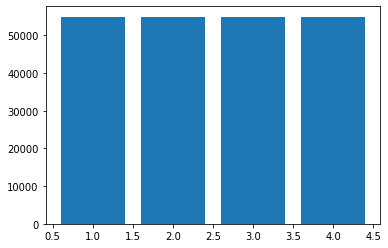

In [20]:
# Split the data into X and y
# Splitting features/target and train/test data
target='injury_severity'
used_cols = [c for c in df.columns.tolist() if c not in [target]]
X=df[used_cols]
y=df[target]

#============================
# summarize distribution Before oversampling
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

# Random Oversampling
 # transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize distribution AFTER oversampling
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()


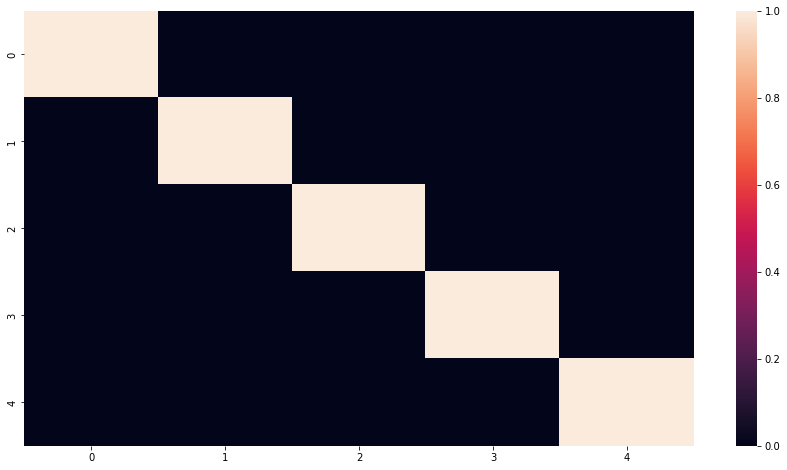

In [22]:
# PCA
scaler = StandardScaler()

# scale features
X_rescaled = scaler.fit_transform(X)

# Split the data into training and test data set
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y, train_size=0.7,test_size=0.3,random_state=42)

# Decide the number of PCA components based on the retained information
pca = PCA(n_components = 5) #0.95 #0.60

# Train the PCA model 
df_train_pca = pca.fit_transform(X_train)
 
# Check the correlations between components
corr_mat = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize=[15,8])
sns.heatmap(corr_mat)
plt.show()
# all of the correlations are near zero (black). 
# This one of the key features of PCA, i.e. the transformed features are not correlated to one another, i.e. their vectors are orthogonal to each other.

# Apply PCA model to the test data
df_test_pca = pca.transform(X_test)
 

In [23]:
print(df_train_pca.shape)
print(df_test_pca.shape)
print(X_rescaled.shape)

(153812, 5)
(65920, 5)
(219732, 20)


In [ ]:
# before oversampling
#(92369, 9)
#(39587, 9)
#(131956, 20)

#after oversampling
#(153812, 9)
#(65920, 9)
#(219732, 20)

In [25]:
# Defining categorical&numerical columns
num_col = ['Day', 'Month', 'Hour_Mins', 'Light', 'Department', 'Location',
       'Intersection', 'Weather_cond', 'Collison_type', 'Latitude',
       'Longtitude', 'user_place', 'sex', 'Birth_year',
       'travel_reason', 'secu1', 'secu2', 'secu3', 'ped_loc', 'ped_action']             
cat_col = []#'acc_id',,'Hour_Mins','Latitude','Longtitude'

Accuracy:
TRAIN: 0.4201232673653551
TEST: 0.4205097087378641

Balanced Accuracy:
TRAIN: 0.42024642575911986
TEST: 0.42022975851587996
[[ 8225  2974  1443  3678]
 [ 1448 11281  2435  1446]
 [ 3332  6970  2852  3319]
 [ 6871  2440  1844  5362]]
-
              precision    recall  f1-score   support

           1       0.41      0.50      0.45     16320
           2       0.48      0.68      0.56     16610
           3       0.33      0.17      0.23     16473
           4       0.39      0.32      0.35     16517

    accuracy                           0.42     65920
   macro avg       0.40      0.42      0.40     65920
weighted avg       0.40      0.42      0.40     65920

-


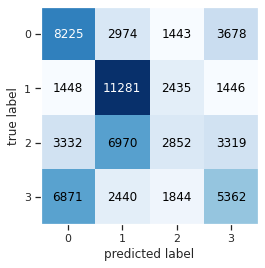

0.2532130032664065 +/- 0.0005981147873144655


In [53]:
# Making pipeline and modeling
#scaler = StandardScaler()#RobustScaler() 
#encoder = ce.TargetEncoder(cols=cat_col) #LabelBinarizer()

# putting numeric columns to scaler and categorical to encoder
#num_transformer = make_pipeline(scaler)
#cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
#preprocessor = ColumnTransformer(
#      transformers=[('num', num_transformer, num_col),
#                    ('cat', cat_transformer, cat_col)])


# set the models
logistic_regression = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', max_iter=5000)#, random_state=42) solver = 'lbfgs'
knn = KNeighborsClassifier(363) # sqr(131956)= 363 OR n=5, 3
decisiontree = DecisionTreeClassifier() #max_depth=8
rfc = RandomForestClassifier (n_estimators=100) #Tune parameters with cross-validation
svm1 = svm.SVC(decision_function_shape='ovo') # or "ovr", same reults
#NB = 

# choose the model
model_name = logistic_regression

# giving all values to pipeline
pipe = make_pipeline(model_name)

# Train the model
pipe.fit(df_train_pca, y_train) #X_train

# make predictions on training set
y_pred = pipe.predict(df_train_pca) #X_train

# make predictions on test set
y_pred_test = pipe.predict(df_test_pca) #X_test

# == to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

print(confusion_matrix(y_test,y_pred_test))
print('-')
print(classification_report(y_test,y_pred_test))
print('-')

# to plot and understand confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

#cross validation
scores = cross_val_score(pipe, X, y)
print(scores.mean(), "+/-", scores.std())

In [ ]:
#END